# 범죄자 범행동기 EDA

## 데이터셋

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 모든 열 보기
pd.options.display.max_rows = 100
pd.options.display.max_columns = None

In [3]:
# 파일 불러오기
df = pd.read_csv("data/범죄자_범행동기_20220602183738.csv", encoding="cp949")

In [4]:
# 컬럼명 변경
df = df.rename(columns={
    "죄종별(1)":"범죄종류", "죄종별(2)" :"범죄명",
    "범행동기별(1)":"범행동기종류", "범행동기별(2)":"범행동기명", 
    "시점":"연도", "데이터":"범죄발생횟수"
})
# 바뀐 컬럼명 확인
df.columns

Index(['범죄종류', '범죄명', '범행동기종류', '범행동기명', '연도', '범죄발생횟수'], dtype='object')

## 결측치

In [5]:
df['범죄발생횟수'] = pd.to_numeric(df['범죄발생횟수'], errors='coerce', downcast='integer')
df['범죄발생횟수'].dtypes

dtype('float64')

In [6]:
# 결측치 0으로 변경 & int타입으로 변경
df['범죄발생횟수'] = df['범죄발생횟수'].fillna(0).astype(int)
# 확인
df.isnull().sum()

범죄종류      0
범죄명       0
범행동기종류    0
범행동기명     0
연도        0
범죄발생횟수    0
dtype: int64

In [7]:
# 컬럼 고유값 확인
for col in df.columns:
    print(col, ":", end = "")
    print(df[col].unique(), end="\n\n")

범죄종류 :['계' '강력범죄' '절도범죄' '폭력범죄' '지능범죄' '풍속범죄' '특별경제범죄' '마약범죄' '보건범죄' '환경범죄'
 '교통범죄' '노동범죄' '안보범죄' '선거범죄' '병역범죄' '기타범죄']

범죄명 :['소계' '살인기수' '살인미수등' '강도' '강간·강제추행' '강간' '유사강간' '강제추행' '기타 강간·강제추행등' '방화'
 '상해' '폭행' '체포·감금' '협박' '약취·유인' '폭력행위등' '공갈' '손괴' '직무유기' '직권남용' '증수뢰' '통화'
 '문서·인장' '유가증권인지' '사기' '횡령' '배임' '성풍속범죄' '도박범죄']

범행동기종류 :['계' '이욕' '사행심' '보복' '가정불화' '호기심' '유혹' '우발적' '현실불만' '부주의' '기타' '미상']

범행동기명 :['소계' '생활비' '유흥비' '도박비' '허영사치심' '치부' '기타']

연도 :[2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]

범죄발생횟수 :[1815233 1723815 1741302 ...   73907   78719   77523]



In [ ]:
df.groupby(by=["연도", "범죄종류"]).sum()


In [94]:
# 소계 하나뿐인지 확인
df.groupby(by=['범죄종류', '범죄명']).count()

범행동기종류  범행동기명   연도  범죄발생횟수
범죄종류   범죄명                                    
강력범죄   강간              143    143  143     143
       강간·강제추행          36     36   36      36
       강도              177    177  177     177
       강제추행            135    135  135     135
       기타 강간·강제추행등     135    135  135     135
       방화              162    162  162     162
       살인기수            151    151  151     151
       살인미수등           145    145  145     145
       소계              180    180  180     180
       유사강간            122    122  122     122
계      소계              180    180  180     180
교통범죄   소계              177    177  177     177
기타범죄   소계              180    180  180     180
노동범죄   소계              156    156  156     156
마약범죄   소계              173    173  173     173
병역범죄   소계              163    163  163     163
보건범죄   소계              175    175  175     175
선거범죄   소계              146    146  146     146
안보범죄   소계              130    130  130     130
절도범죄   소계              180    180  180     180
지능범죄   문서·인장           177    177  177     177
       배임              168    168  168     168
       사기              180    180  180     180
       소계              180    180  180     180
       유가증권인지          140    140  140     140
       증수뢰             154    154  154     154
       직권남용            123    123  123     123
       직무유기            119    119  119     119
       통화              143    143  143     143
       횡령              179    179  179     179
특별경제범죄 소계              180    180  180     180
폭력범죄   공갈              178    178  178     178
       상해              178    178  178     178
       소계              180    180  180     180
       손괴              175    175  175     175
       약취·유인           152    152  152     152
       체포·감금           162    162  162     162
       폭력행위등           180    180  180     180
       폭행              178    178  178     178
       협박              169    169  169     169
풍속범죄   도박범죄            176    176  176     176
       성풍속범죄           174    174  174     174
       소계              179    179  179     179
환경범죄   소계              160    160  160     160

In [98]:
# 소계 하나뿐인지 확인
df.groupby(by=['범행동기종류', '범행동기명']).mean()

,,범죄발생횟수
범행동기종류,범행동기명,
가정불화,소계,1189.823377
계,소계,97204.698113
기타,소계,26389.952830
미상,소계,31187.962264
보복,소계,28.991018
부주의,소계,10805.800000
사행심,소계,1398.844156
우발적,소계,16647.597156
유혹,소계,510.124682


In [99]:
# 범죄종류별 범행동기
df.groupby(by=['범죄종류', '범행동기종류']).mean()

범죄발생횟수
범죄종류 범행동기종류             
강력범죄 가정불화      58.361446
     계       6323.476190
     기타      1799.119048
     미상      1229.976190
     보복         4.722222
...                  ...
환경범죄 우발적       50.100000
     유혹         9.300000
     이욕       136.964286
     현실불만       3.300000
     호기심        9.400000

[192 rows x 1 columns]

In [ ]:
# '계' 들어가는 행 삭제
drops_col = ['강력범죄', '지능범죄', '폭력범죄', '풍속범죄']
drops = ((df['범죄명'].str.contains('계')) & (df['범죄종류'] == '강력범죄')) |\
((df['범죄명'].str.contains('계')) & (df['범죄종류'] == '폭력범죄')) |\
((df['범죄명'].str.contains('계')) & (df['범죄종류'] == '지능범죄')) |\
((df['범죄명'].str.contains('계')) & (df['범죄종류'] == '풍속범죄')) |\
    df['범죄종류'].str.contains('계') | df['범행동기종류'].str.contains('계')
df = df[~drops]

#확인
df.tail(10)

In [ ]:
# 컬럼 고유값 확인
for col in df.columns:
    print(col, ":", end = "")
    print(df[col].unique(), end="\n\n")

In [ ]:
# 범죄명이 '소계'로 된 컬럼명 바꾸기
drops_col = ['강력범죄', '지능범죄', '폭력범죄', '풍속범죄']
for col in df['범죄종류'].unique().tolist():
    if col not in drops_col:
        df.loc[df['범죄종류'] == col, '범죄명'] = col

In [ ]:
# 소계 확인
df.groupby(by=['범행동기종류', '범행동기명']).count()

In [ ]:
# 범행동기명이 '소계'로 된 컬럼명 바꾸기
drops = ['이욕']
for col in df['범행동기종류'].unique().tolist():
    if col not in drops:
        df.loc[df['범행동기종류'] == col, '범행동기명'] = col

In [ ]:
# 제대로 변경 되었는지 확인
df.groupby(by=['범행동기종류', '범행동기명']).count()

In [ ]:
# 이욕의 범행동기명 중 '계' 들어가는 행 삭제
drops=((df['범행동기종류'] == '이욕') & (df['범행동기명'] == '소계'))
df = df[~drops]
#확인
df.groupby(by=['범행동기종류', '범행동기명']).count()

In [ ]:
# 인덱스 재정의
df = df.reset_index(drop=True)
df.head()

In [ ]:
# 컬럼 재정렬
cols = ["범죄명", "연도", "범행동기명", "범행동기종류","범죄종류" , "범죄발생횟수"]
df = df[cols]

In [ ]:
# 데이터 확인
df.head(5)

In [ ]:
# 데이터 shape
df.shape

## 데이터 요약

In [ ]:
# 데이터 요약
df.info()

In [ ]:
# 수치형통계
df.describe()

In [ ]:
# 범죄발생횟수가 가장 많은 범죄명, 연도, 범행동기명, 범행동기종류
df[df["범죄발생횟수"]==187583]

In [ ]:
# 범주형 통계
df.describe(include="object")

In [ ]:
# 인덱스명 범죄종류로 바꾸기
df.set_index('범죄명')

In [ ]:
df.groupby(by=['연도', '범죄명']).mean().head(30).sort_values("범죄발생횟수", ascending=False)

In [ ]:
# 컬럼 고유값 재확인
for col in df.columns:
    print(col, ":", end = "")
    print(df[col].unique(), end="\n\n")

In [ ]:
#파일 저장
df.to_csv("범죄자_범행동기_2011_2020.csv", index=False)

## 시각화

In [10]:
# 연도 object 타입으로 바꾸기   
df["연도"] = df["연도"].astype("object")

# 데이터 타입 확인
df.dtypes

범죄종류      object
범죄명       object
범행동기종류    object
범행동기명     object
연도        object
범죄발생횟수     int64
dtype: object

In [ ]:
# 범죄명 빈도수 확인
df["범죄명"].value_counts()

In [11]:
# 시각화를 위한 한글폰트 설정
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family


plt.style.use("seaborn-whitegrid")

# 폰트설정
plt.rc("font", family=get_font_family())
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

In [ ]:
# 범죄명 빈도수 countplot으로 시각화
# _ = sns.countplot(x=df["범죄명"])
plt.figure(figsize=(30, 10))
_ = sns.countplot(data=df, x="범죄명", palette="Set3")

In [ ]:
# 연도에 따른 빈도수
df["연도"].value_counts()

In [ ]:
# 연도에 따른 빈도수 시각화
_ = sns.countplot(data=df, x="연도", palette="RdPu")

In [ ]:
# 범행동기종류별 빈도수
df["범행동기종류"].value_counts()

In [ ]:
# 범행동기종류 시각화
plt.figure(figsize=(20, 10))
_ = sns.countplot(data=df, x="범행동기종류", palette="Pastel1")

In [ ]:
# 이욕 중 금전적 범행동기 종류 빈도수
df_greed = df[(df["범행동기명"] =="생활비") | (df["범행동기명"] =="유흥비")| \
             (df["범행동기명"] =="도박비") | (df["범행동기명"] =="허영사치심")| \
             (df["범행동기명"] =="치부") ]
df_greed["범행동기명"].value_counts()

In [ ]:
# 이욕 중 금전적 범행동기종류 시각화
_ = sns.countplot(data=df_greed, x="범행동기명", palette = "Pastel2")

In [ ]:
# 범죄종류 빈도수
df["범죄종류"].value_counts()

In [ ]:
# 범죄종류 시각화
plt.figure(figsize=(20, 10))
_ = sns.countplot(data=df, x="범죄종류", palette = "Paired")

In [ ]:
# 수치형데이터 분포 시각화
_ = df.hist(bins=500)

### 연도별

In [ ]:
# 연도별 

In [ ]:
# 범죄종류와 범행동기별 평균 범죄발생횟수


In [ ]:
df_1 = df[~(df["범죄종류"]=="계")]
df_1[["범죄종류", "연도", "범죄발생횟수"]]

In [ ]:
# 연도와 범죄별 범죄발생횟수
df_01 = pd.crosstab(df_1["연도"], df_1["범죄종류"])
df_01

In [ ]:

    sns.pairplot(data=df_1[df_1["범죄종류"].isin(["강력범죄", "교통범죄", "기타범죄"])], hue="범죄종류")

In [8]:
df_year = df[["연도", "범죄발생횟수"]]

<AxesSubplot:title={'center':'연도별 평균 범죄발생횟수'}, xlabel='연도'>

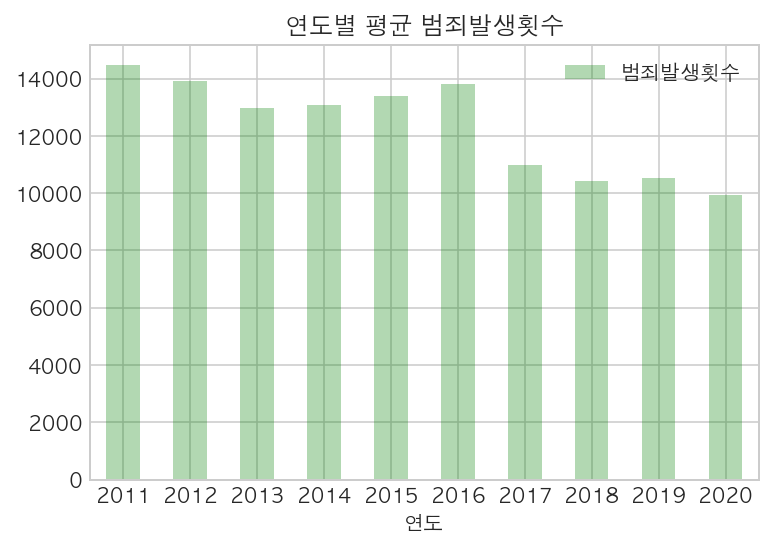

In [24]:
# 연도별 평균 범죄발생횟수
df_year = df[["연도", "범죄발생횟수"]]
year = df_year.groupby(by=['연도']).mean()
year.plot.bar(rot=0, title="연도별 평균 범죄발생횟수", color="green", alpha=0.3)

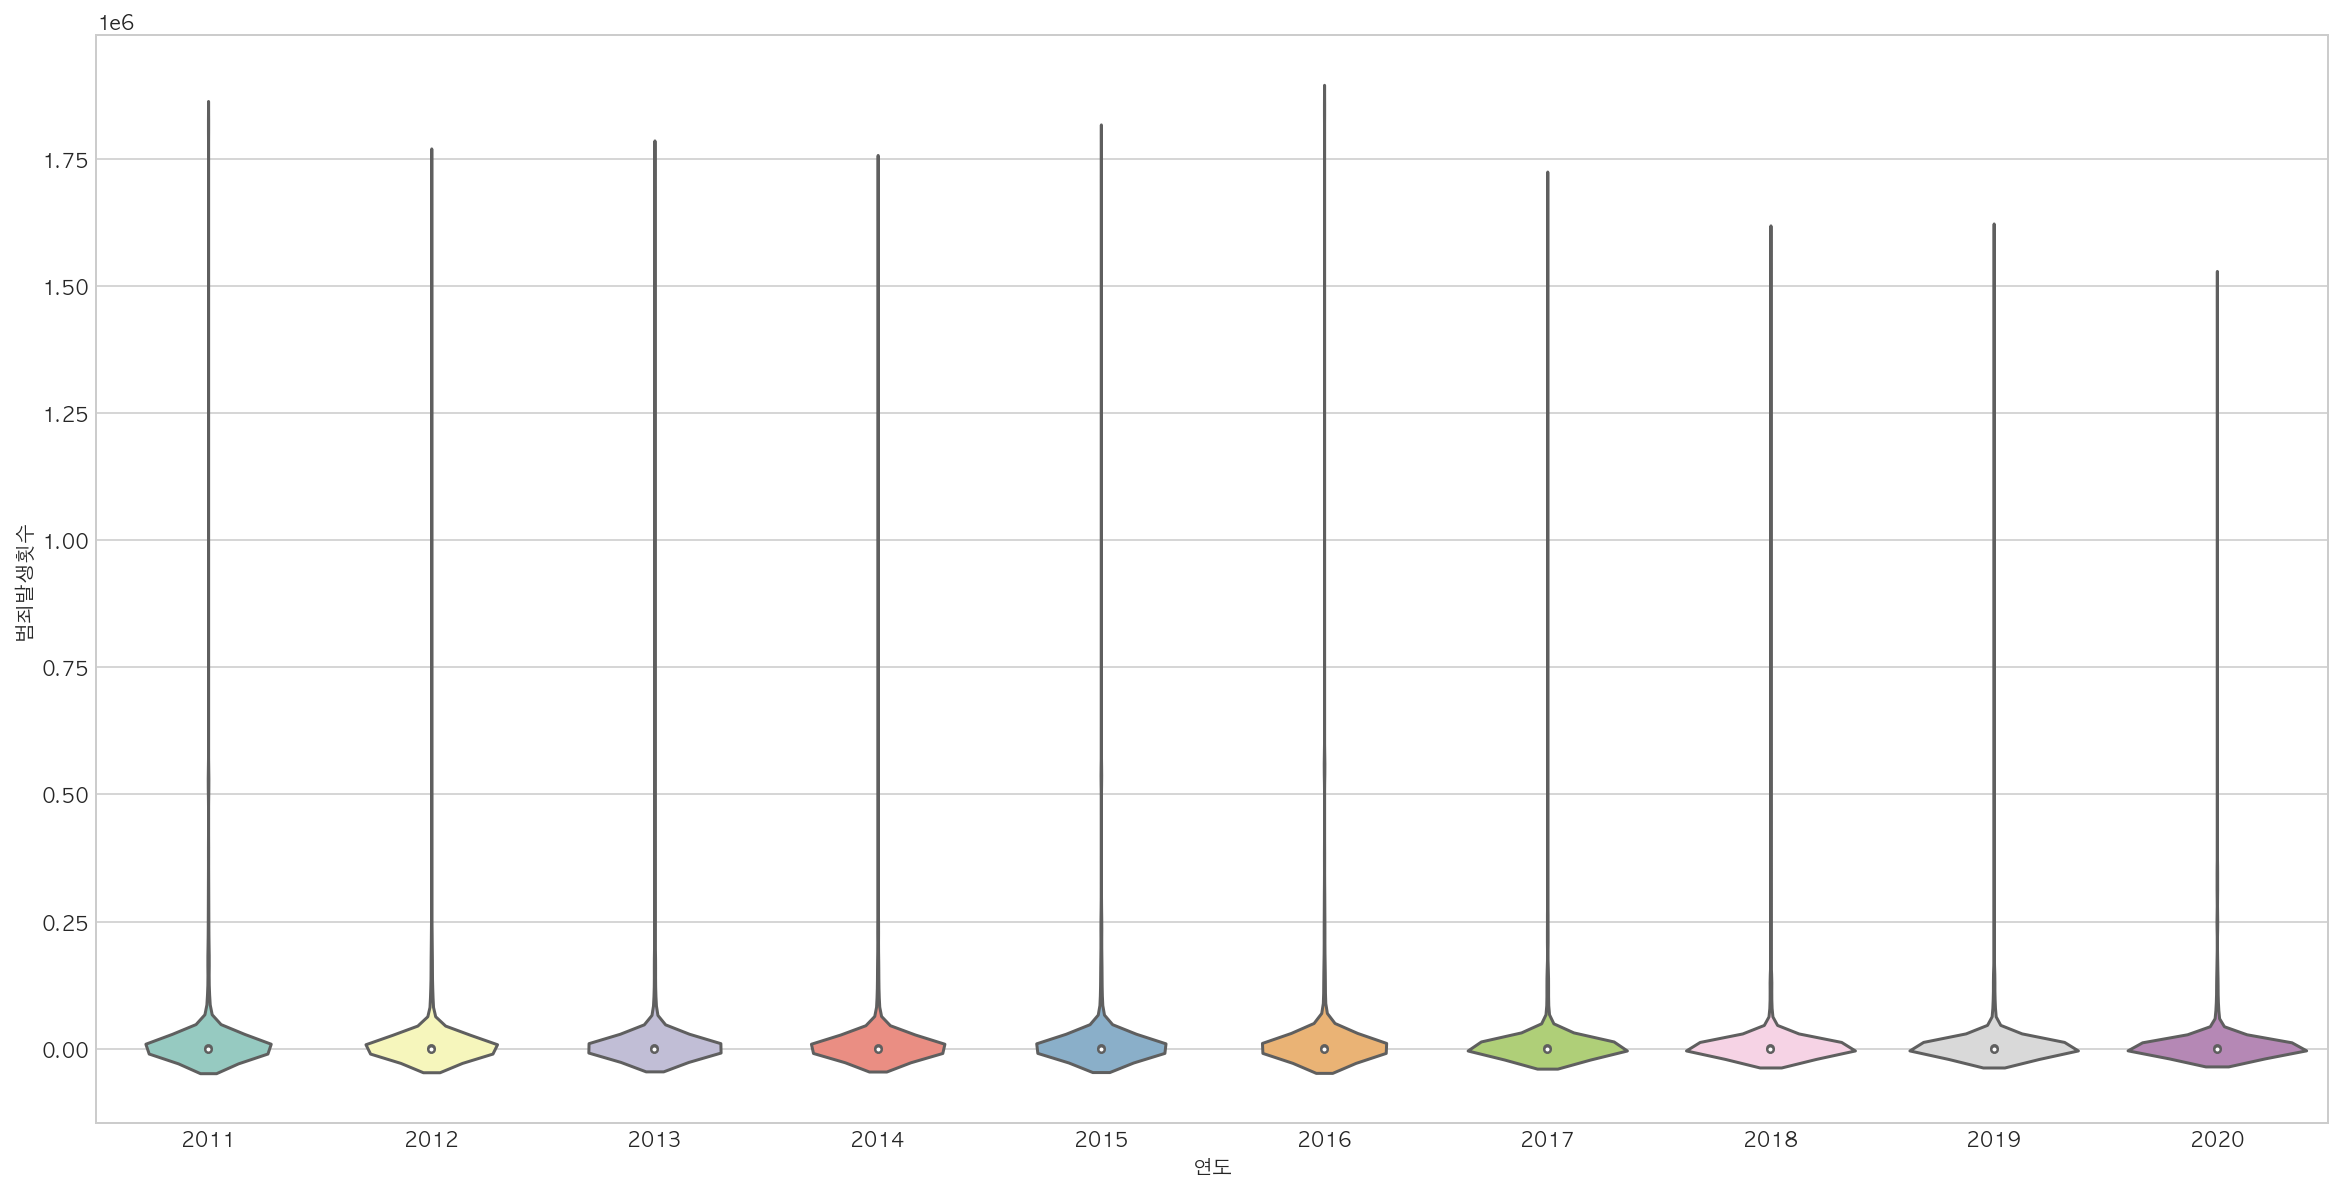

In [18]:
# 연도별 범죄발생횟수
plt.figure(figsize=(20, 10))
_ = sns.violinplot(data=df_year, x="연도", y="범죄발생횟수", palette="Set3", title="연도별 범죄발생횟수 분포")

* 연도별로 범죄발생횟수의 분포는 비슷한 양상을 띄고 있습니다. 다만, 2011년과 2016에 범죄종류 중 어떠한 것이 굉장히 많이 발생했다는 것을 알 수 있고, 최근으로 올수록 특정 범죄종류가 많이 발생하는 양상은 줄어든 것을 확인할 수 있습니다.

In [ ]:
# 범죄종류에서 계 제외하고 s에 저장
s = df[~(df["범죄종류"]=="계")]

<AxesSubplot:title={'center':'2011년 범죄종류별 평균 범죄발생횟수'}, xlabel='범죄종류'>

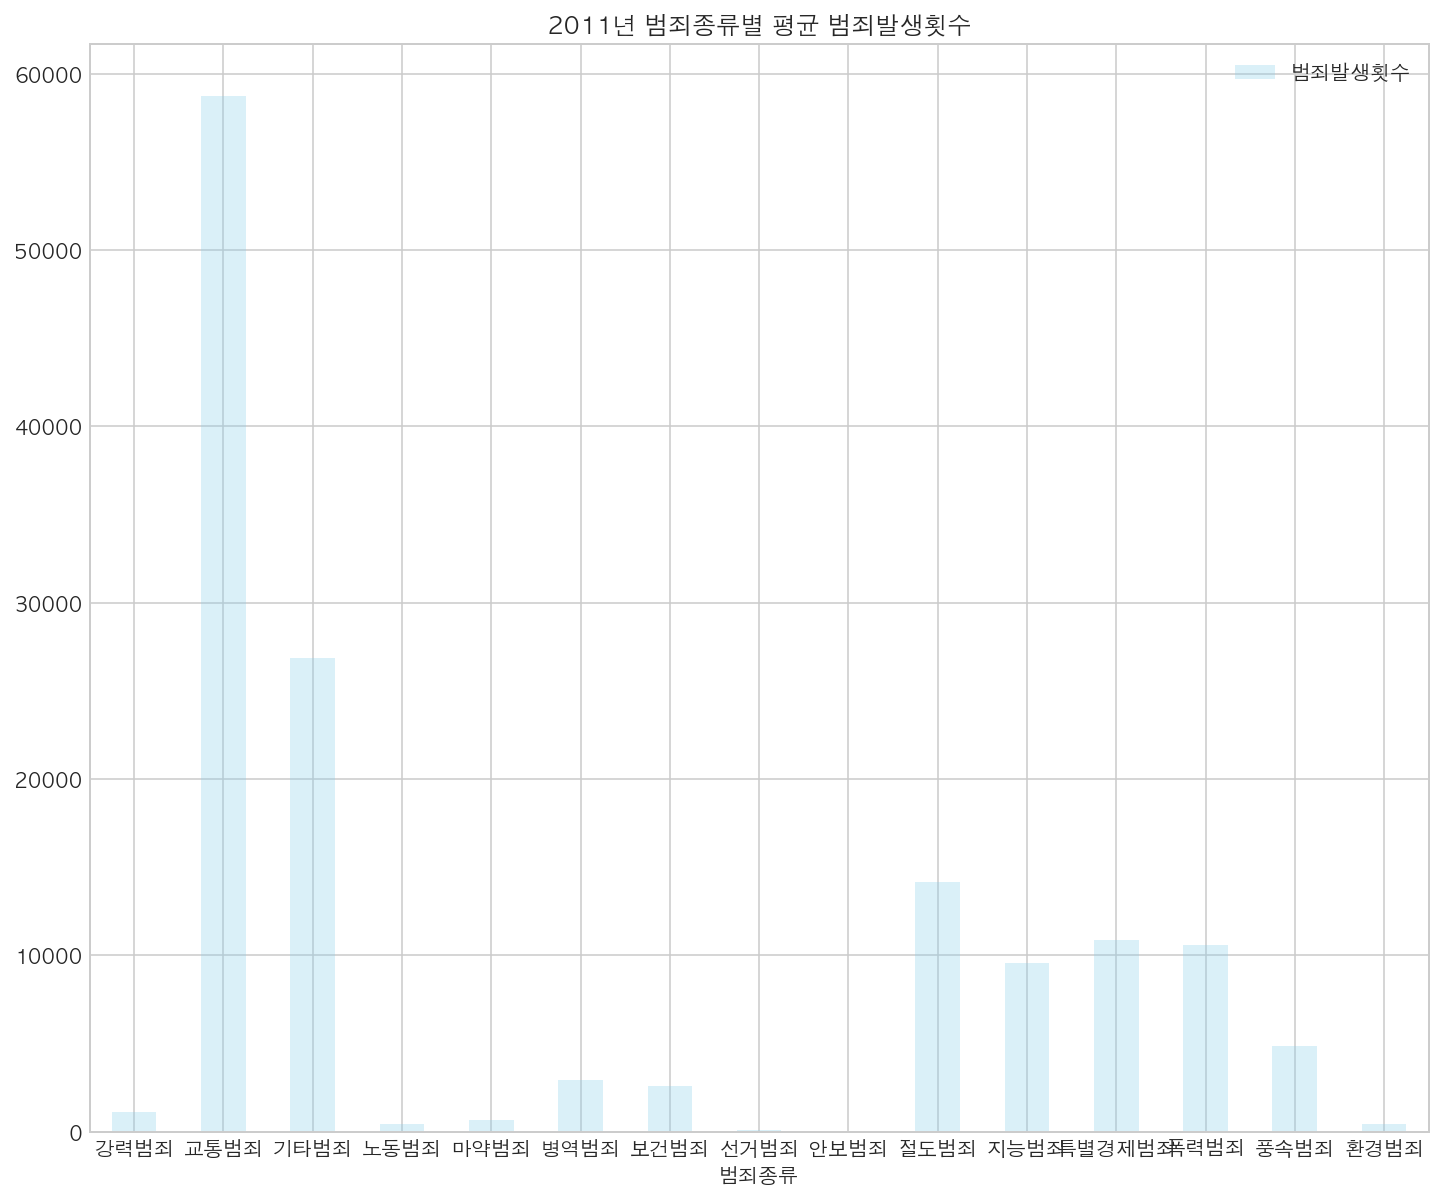

In [72]:
# 2011년 범죄종류별 평균 범죄발생횟수
s_2011 = s.loc[s["연도"]==2011, ["범죄종류", "범죄발생횟수"]]
s_2011_ = s_2011.groupby(by=['범죄종류']).mean()
s_2011_.plot.bar(rot=0, title="2011년 범죄종류별 평균 범죄발생횟수", color="skyblue", alpha=0.3, figsize=(12, 10))

<AxesSubplot:title={'center':'2016년 범죄종류별 평균 범죄발생횟수'}, xlabel='범죄종류'>

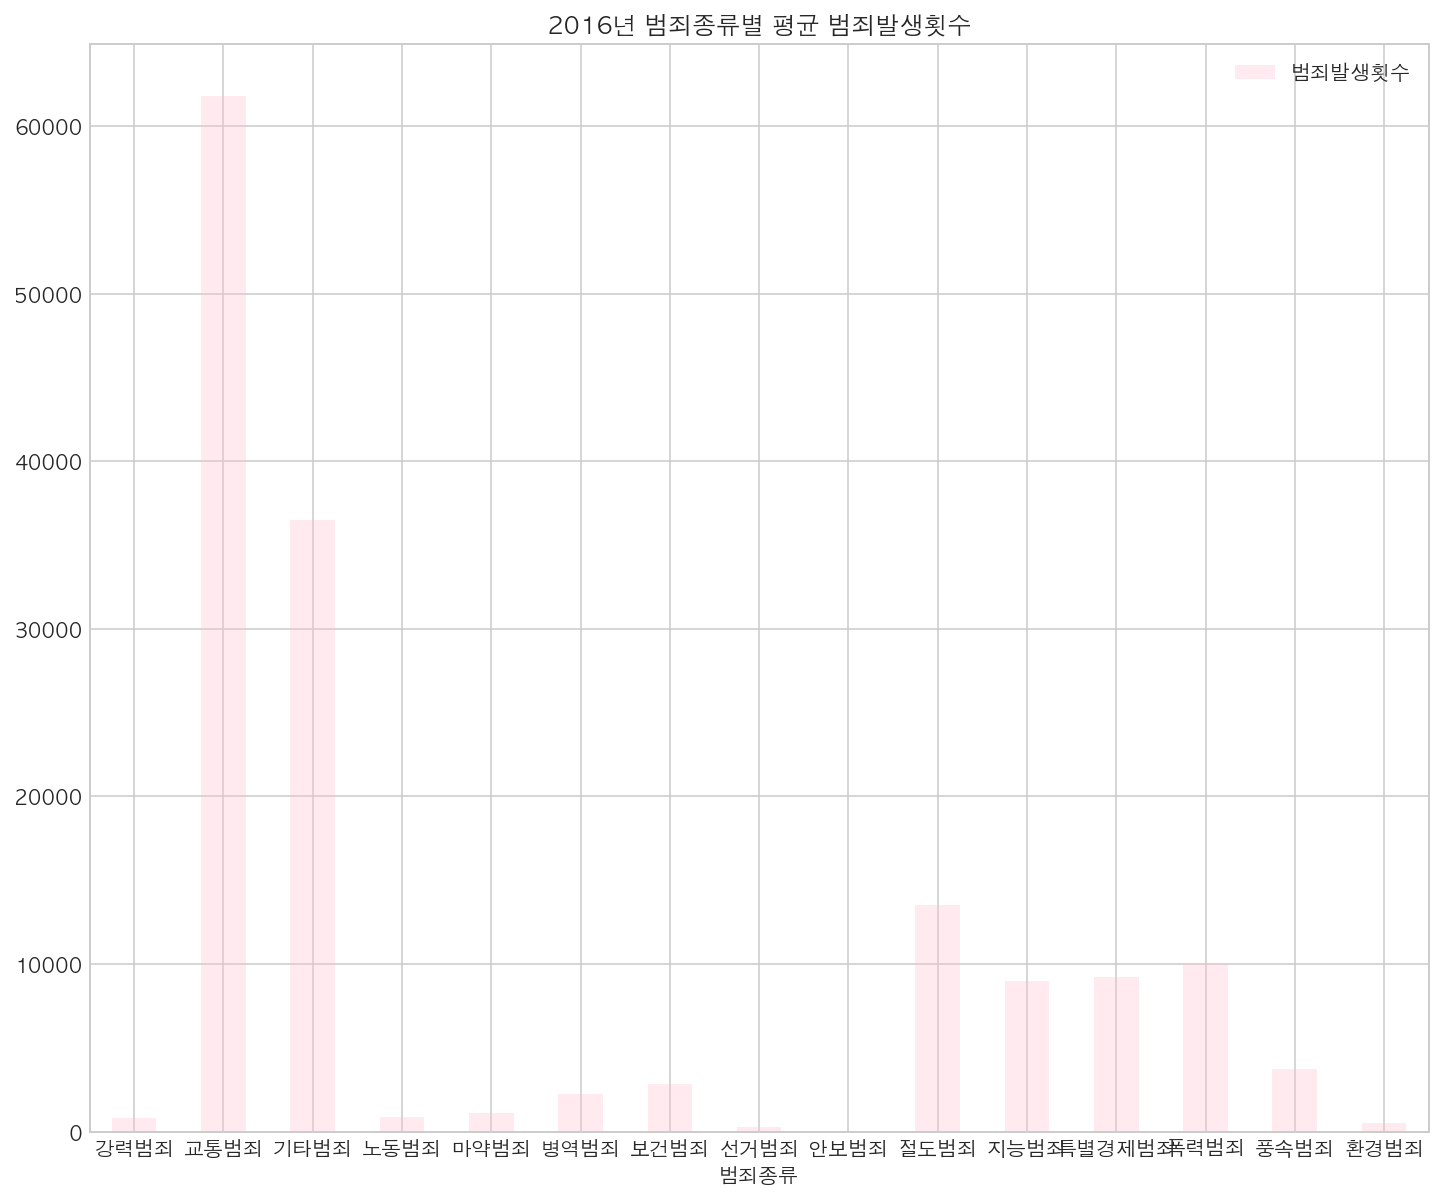

In [73]:
# 2016년 범죄종류별 평균 범죄발생횟수
s_2016 = s.loc[s["연도"]==2016, ["범죄종류", "범죄발생횟수"]]
s_2016_ = s_2016.groupby(by=['범죄종류']).mean()
s_2016_.plot.bar(rot=0, title="2016년 범죄종류별 평균 범죄발생횟수", color="pink", alpha=0.3, figsize=(12, 10))

<AxesSubplot:xlabel='범죄종류', ylabel='범죄발생횟수'>

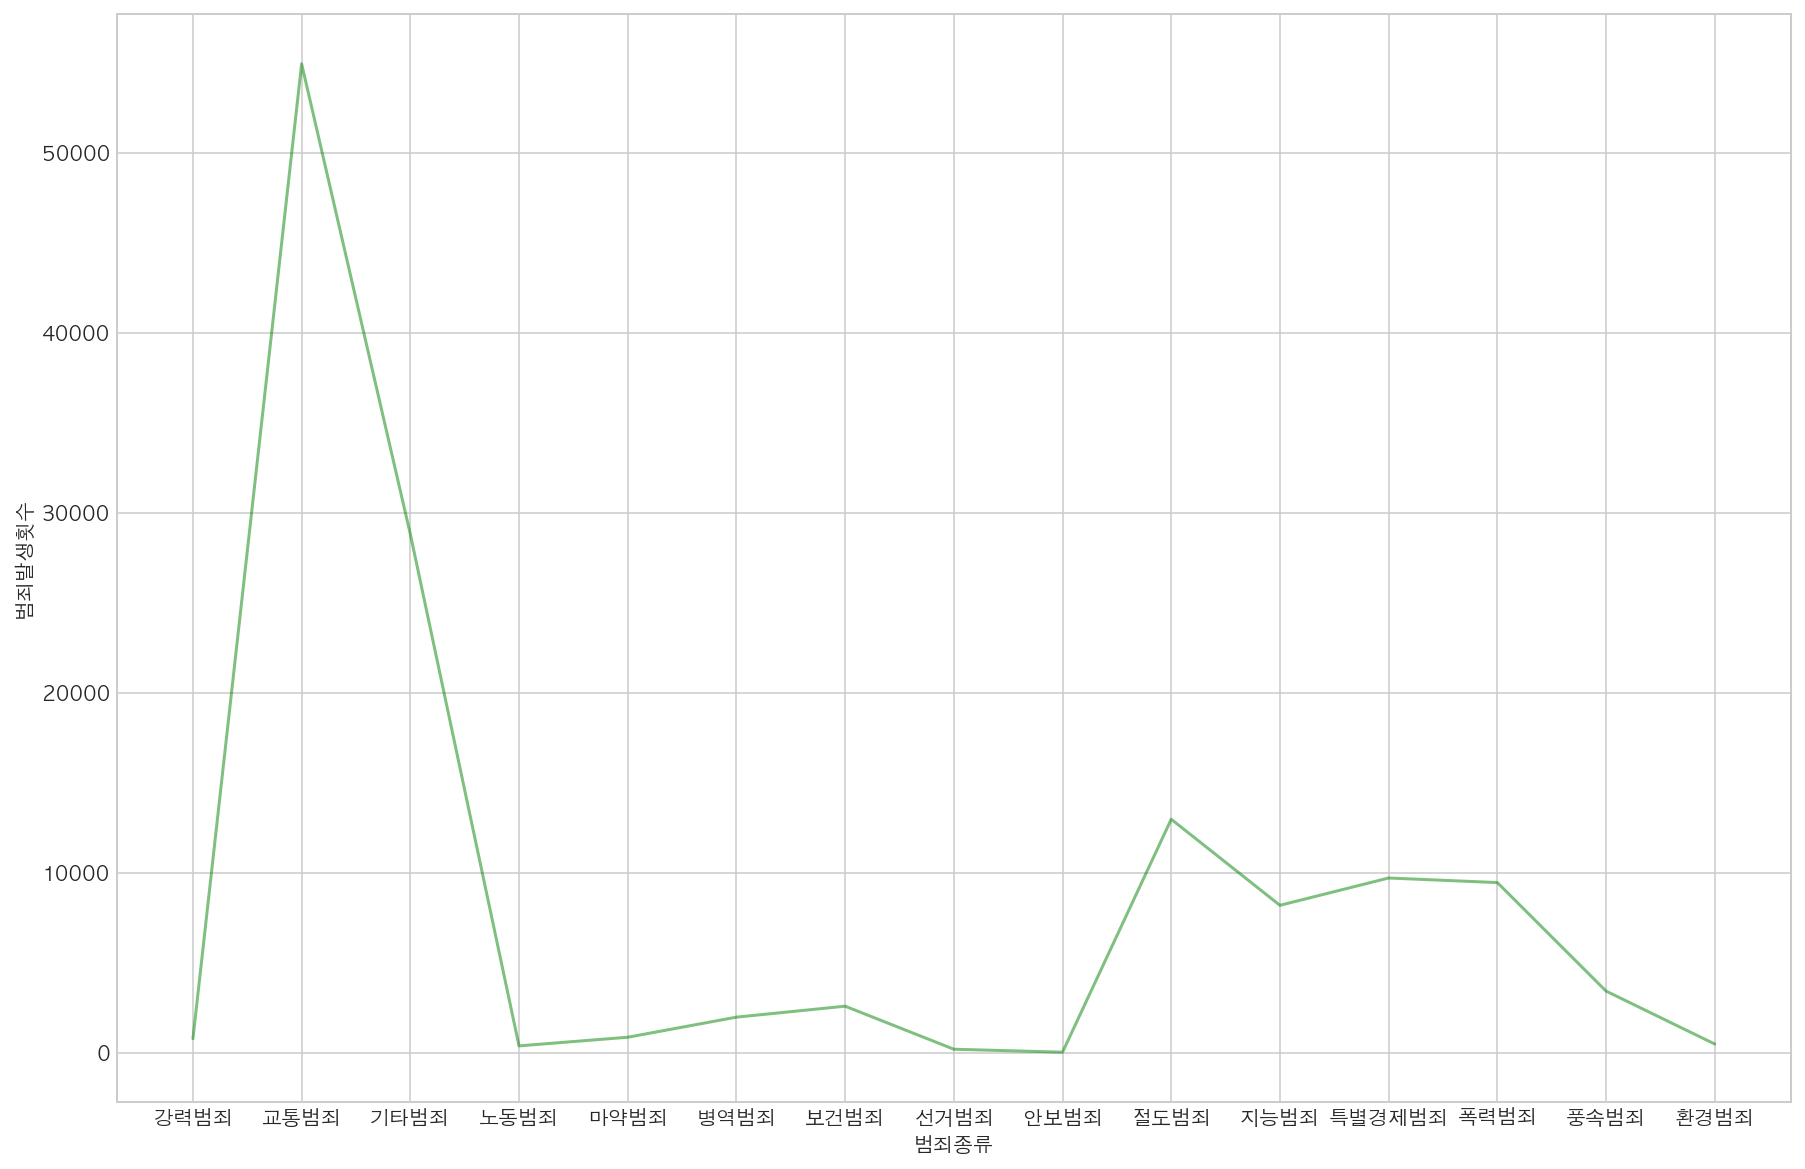

In [93]:
# 범죄종류별 범죄발생횟수

df1 = s.groupby(by=["범죄종류"]).mean()
# df1.plot.bar(rot=0, title="범죄종류별 범죄발생횟수", color="green", alpha=0.3, figsize=(12, 10))
plt.figure(figsize=(15, 10))
sns.lineplot(data=df1, x="범죄종류", y="범죄발생횟수", ci=None, color="green", alpha=0.5)

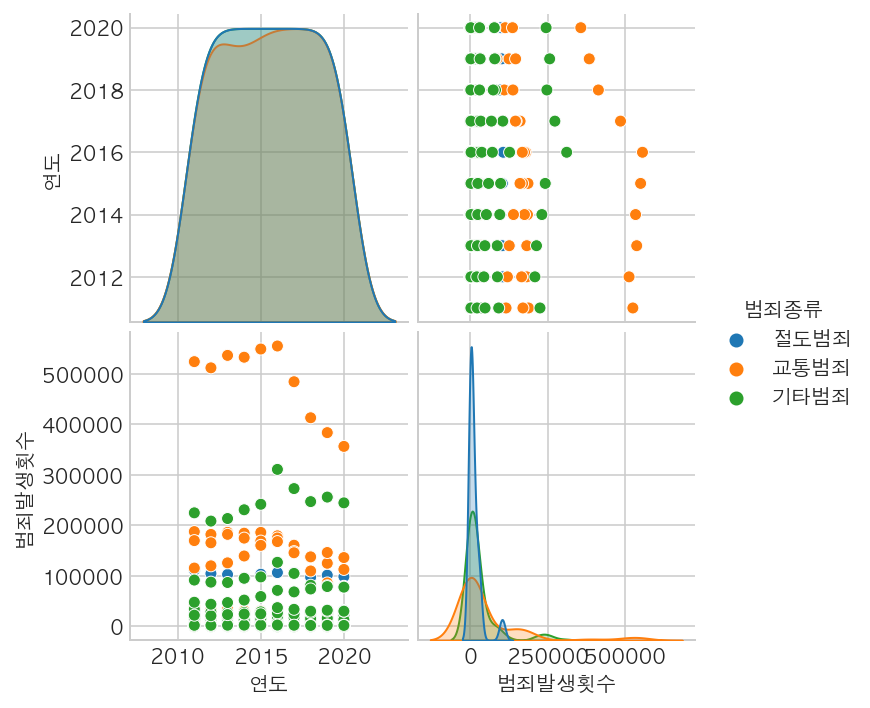

In [145]:
sns.pairplot(data=s[s["범죄종류"].isin(["교통범죄", "기타범죄", "절도범죄"])], hue="범죄종류")

<AxesSubplot:title={'center':'지능범죄 평균범죄발생횟수'}, xlabel='범죄명'>

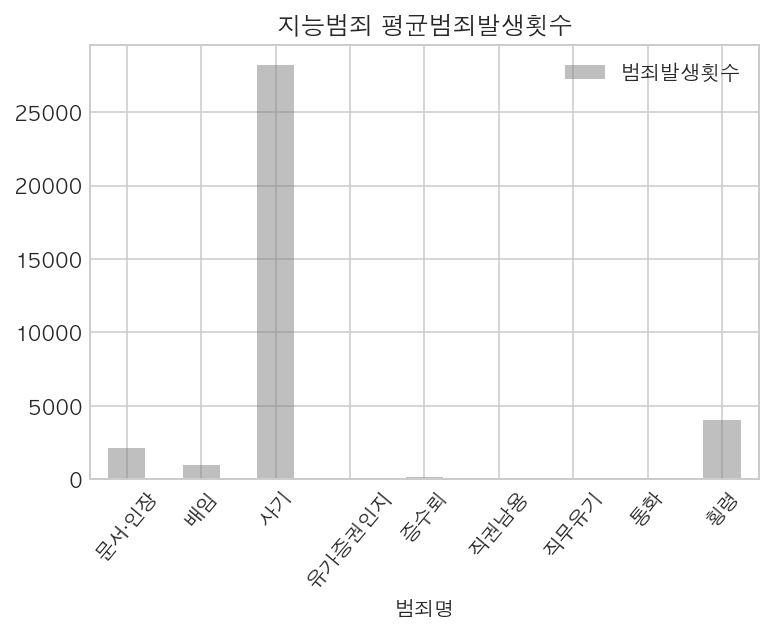

In [111]:
# 지능범죄중 어떤 범죄가 평균범죄발생횟수가 많은지
df_intelli = df[(df["범죄명"]=="문서·인장")|(df["범죄명"]=="배임")|(df["범죄명"]=="사기")\
|(df["범죄명"]=="유가증권인지")|(df["범죄명"]=="증수뢰")|(df["범죄명"]=="직권남용")\
|(df["범죄명"]=="직무유기")|(df["범죄명"]=="통화")|(df["범죄명"]=="횡령")]
intelli = df_intelli.groupby(by=["범죄명"]).mean()
intelli.plot.bar(rot=50, title="지능범죄 평균범죄발생횟수", color="gray", alpha=0.5)

<AxesSubplot:title={'center':'폭력범죄 평균범죄발생횟수'}, xlabel='범죄명'>

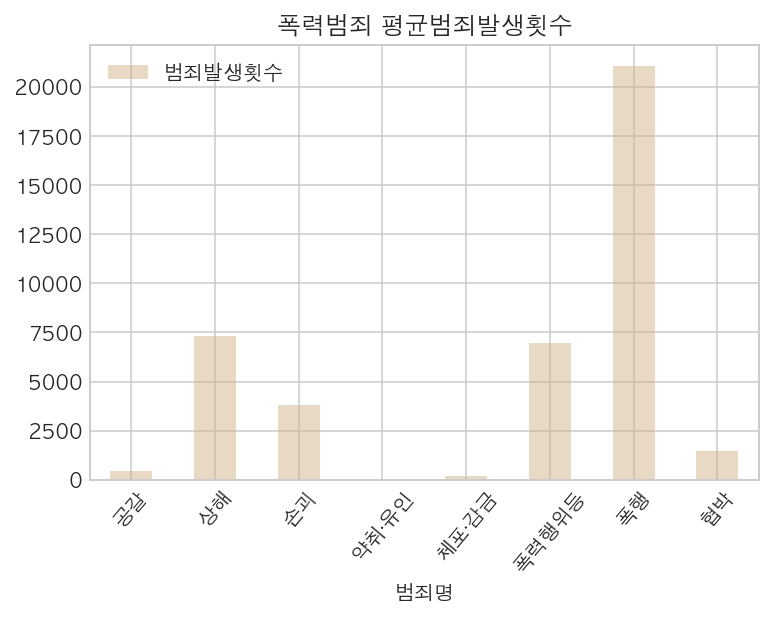

In [113]:
# 폭력범죄중 어느 범죄가 평균범죄발생횟수가 많은지
df_violence = df[(df["범죄명"]=="공갈")|(df["범죄명"]=="상해")|(df["범죄명"]=="손괴")\
|(df["범죄명"]=="약취·유인")|(df["범죄명"]=="체포·감금")|(df["범죄명"]=="폭력행위등")\
|(df["범죄명"]=="폭행")|(df["범죄명"]=="협박")]
violence = df_violence.groupby(by=["범죄명"]).mean()
violence.plot.bar(rot=50, title="폭력범죄 평균범죄발생횟수", color="tan", alpha=0.5)

In [121]:
# 범죄종류별 범행동기종류 계 제외하고 데이터 만들기
drops=(df["범죄종류"].str.contains("계"))|(df["범행동기종류"].str.contains("계"))
df2 = df[~ drops]
df2[["범죄종류", "범행동기종류"]]

,범죄종류,범행동기종류
190,강력범죄,이욕
191,강력범죄,이욕
192,강력범죄,이욕
193,강력범죄,이욕
194,강력범죄,이욕
...,...,...
7025,기타범죄,미상
7026,기타범죄,미상
7027,기타범죄,미상
7028,기타범죄,미상


In [ ]:
df1 = s.groupby(by=["범죄종류"]).mean()
# df1.plot.bar(rot=0, title="범죄종류별 범죄발생횟수", color="green", alpha=0.3, figsize=(12, 10))
plt.figure(figsize=(15, 10))
sns.lineplot(data=df1, x="범죄종류", y="범죄발생횟수", ci=None, color="green", alpha=0.5)

<AxesSubplot:xlabel='범행동기종류', ylabel='범죄발생횟수'>

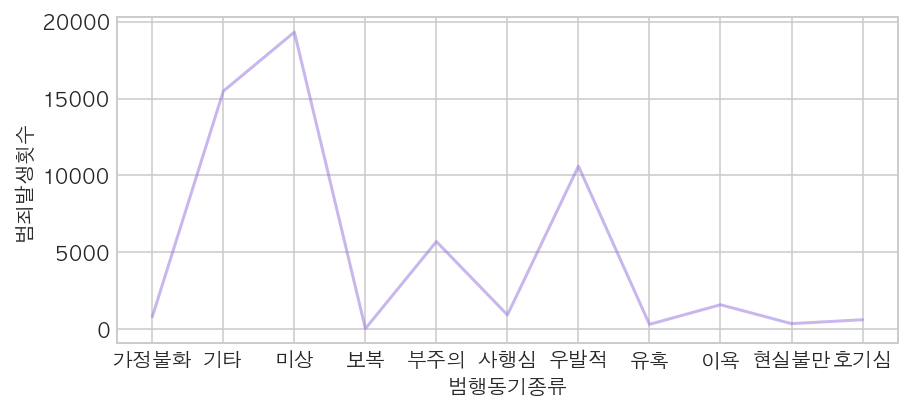

In [134]:
# 범행동기별 범죄발생횟수
df02 = df2.groupby(by=["범행동기종류"]).mean()
plt.figure(figsize=(7, 3))
sns.lineplot(data=df02, x="범행동기종류", y="범죄발생횟수", ci=None, color="mediumpurple", alpha=0.5)

<AxesSubplot:xlabel='범행동기종류', ylabel='범죄발생횟수'>

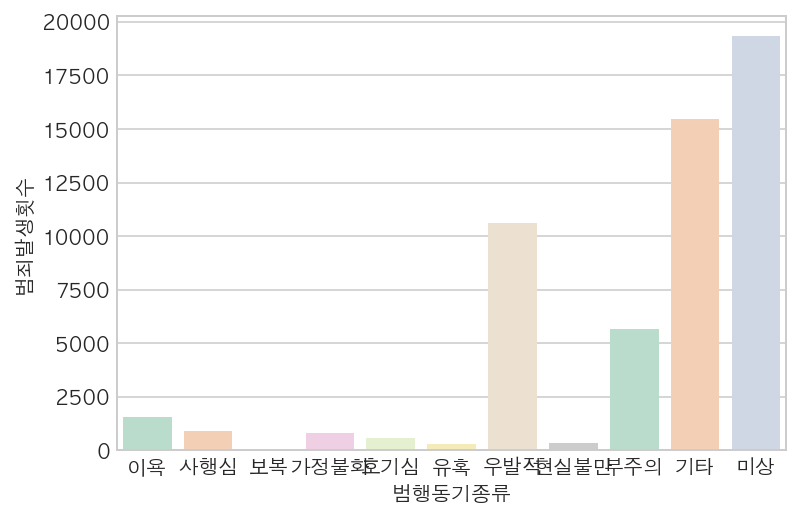

In [146]:
# 범행동기별 범죄발생횟수
sns.barplot(data=df2, x="범행동기종류", y="범죄발생횟수", ci=None, palette = "Pastel2")

<AxesSubplot:xlabel='범죄종류', ylabel='범죄발생횟수'>

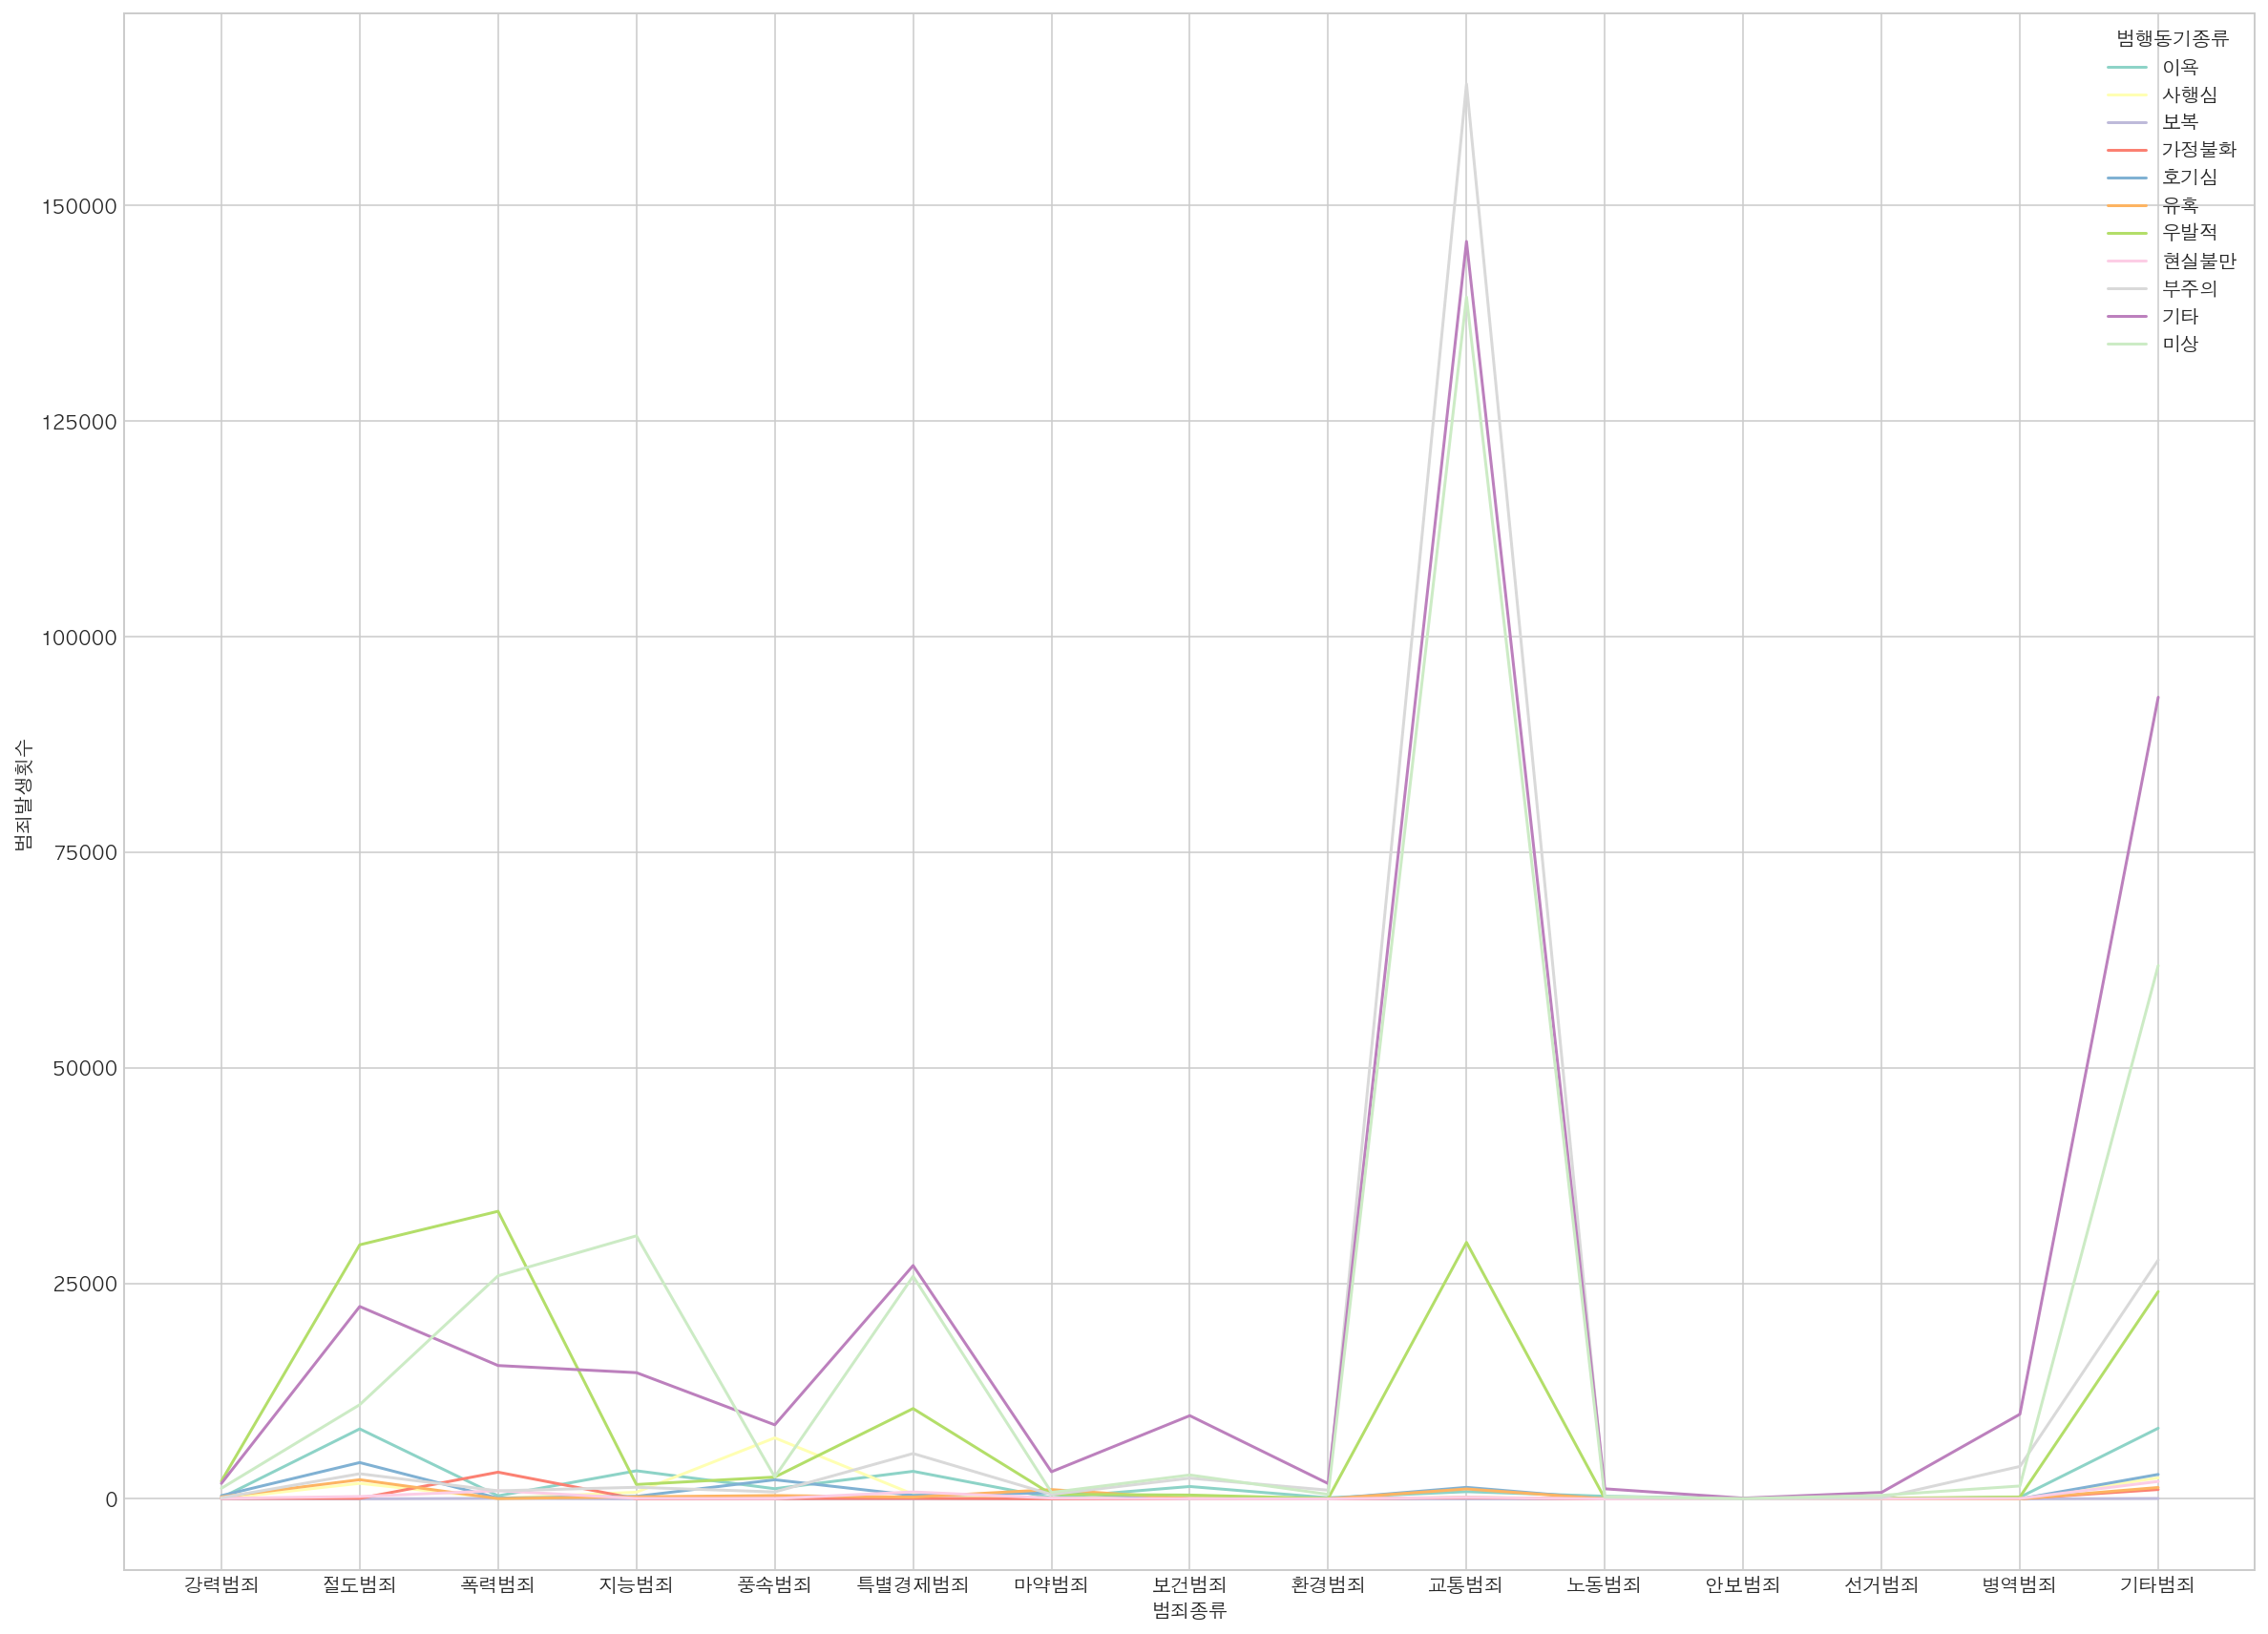

In [176]:
# 범죄종류와 범행동기에 따른 범죄발생횟수
plt.figure(figsize=(20, 15))
sns.lineplot(data = df2, x="범죄종류", y="범죄발생횟수", hue="범행동기종류",
             ci=None, palette="Set3")

<Figure size 1080x720 with 0 Axes>

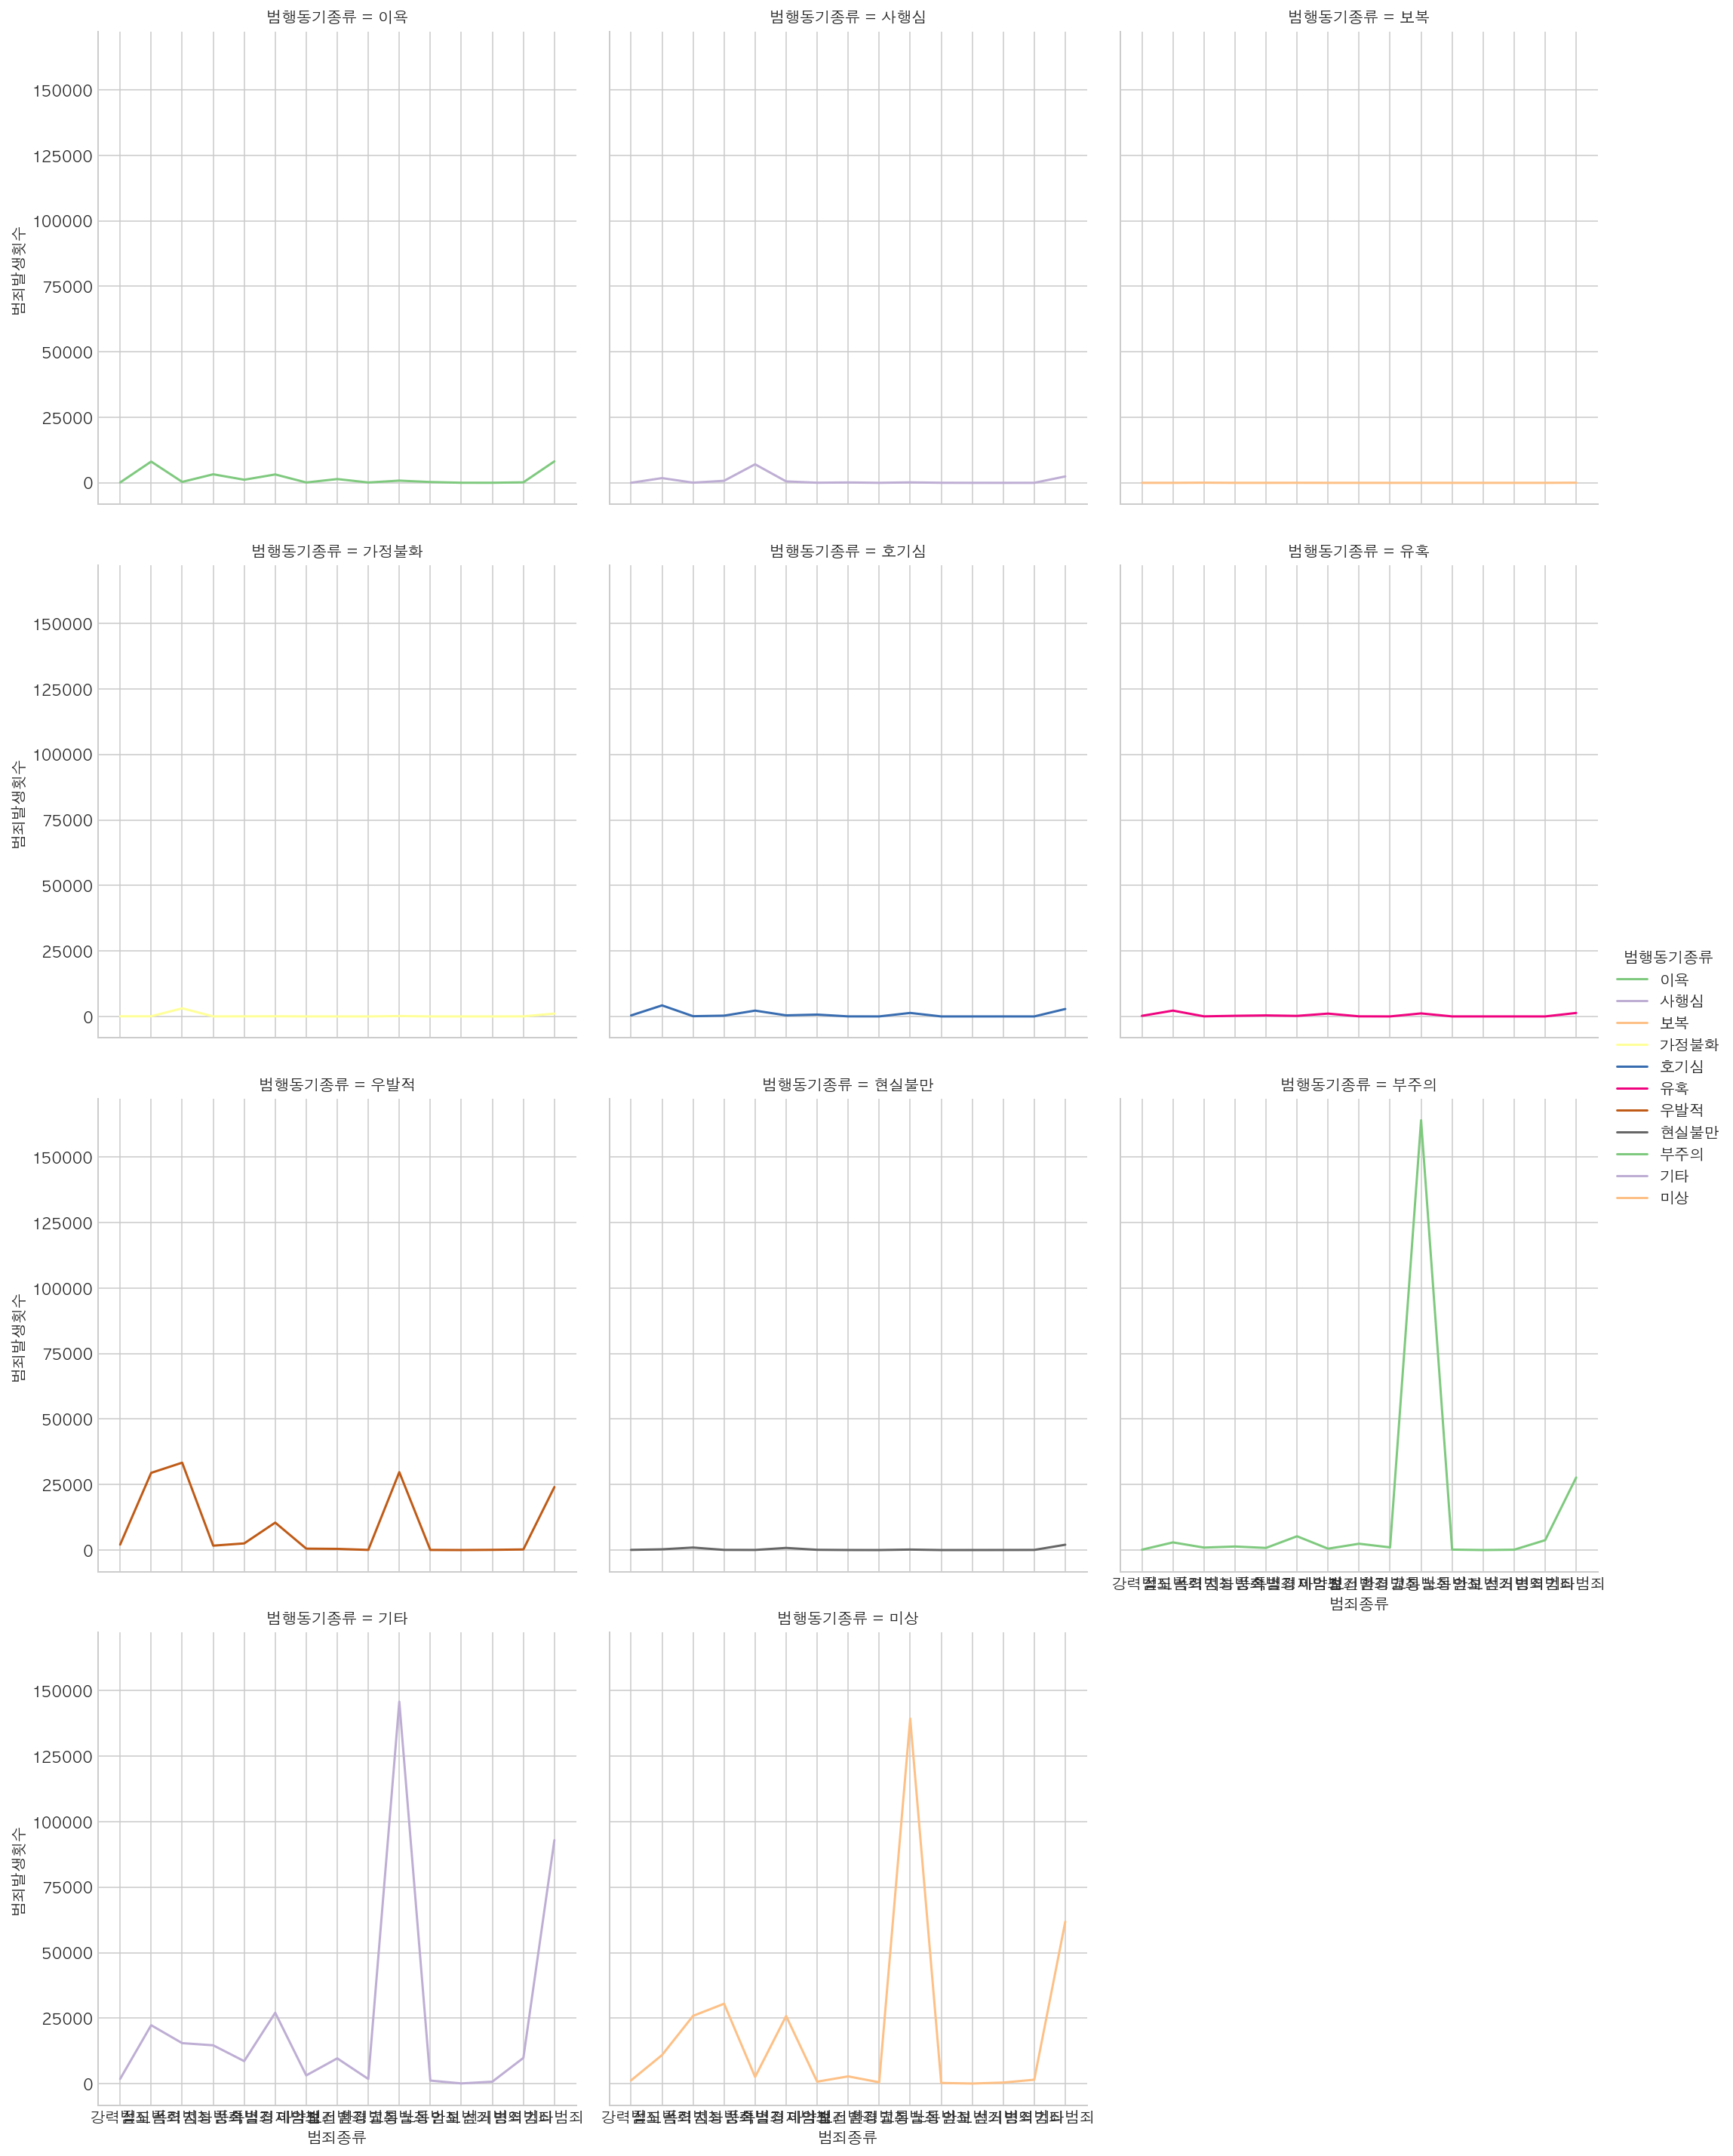

In [184]:
plt.figure(figsize=(15, 10))
sns.relplot(data=df2, x="범죄종류", y="범죄발생횟수", hue="범행동기종류",
           col="범행동기종류", ci=None, kind="line", palette="Accent", col_wrap=3)

<AxesSubplot:title={'center':'이욕별 평균 범죄발생횟수'}, xlabel='범행동기명'>

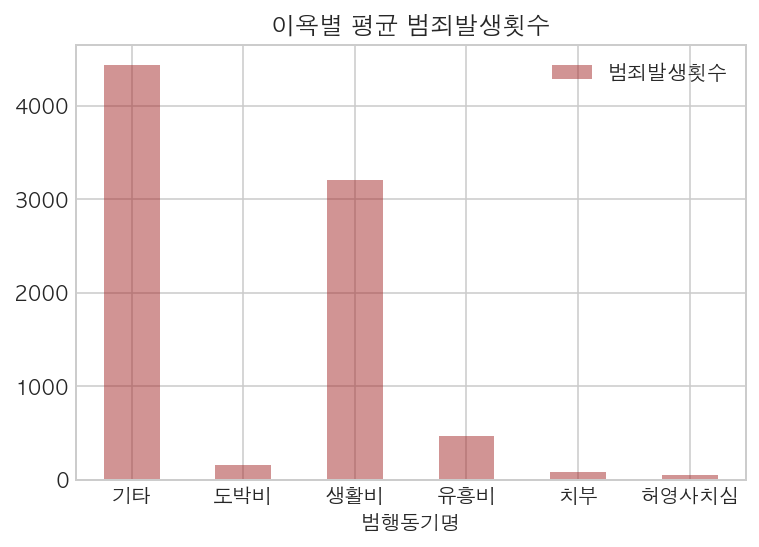

In [193]:
# 이욕별 평균 범죄발생횟수
# 연도별 평균 범죄발생횟수
# 범죄종류별 범행동기종류 계 제외하고 데이터 만들기
# 2016년 범죄종류별 평균 범죄발생횟수
# s_2016 = s.loc[s["연도"]==2016, ["범죄종류", "범죄발생횟수"]]
# s_2016_ = s_2016.groupby(by=['범죄종류']).mean()
# s_2016_.plot.bar(rot=0, title="2016년 범죄종류별 평균 범죄발생횟수", color="pink", alpha=0.3, figsize=(12, 10))

df4 = df[~(df["범행동기명"]=="소계")]
df_4 = df4.groupby(by="범행동기명").mean()
df_4.plot.bar(rot=0, title="이욕별 평균 범죄발생횟수", color="brown",
             alpha=0.5)